Ce notebook présente différentes algorithmes de Machine Learning appliqués à des tweets.
Il s'agit d'un projet d'étude réalisé dans le cadre du DU Data Analysis de la Sorbonne.

# 1. Import des librairies et des données
* https://mihaelagrigore.medium.com/scraping-historical-tweets-without-a-twitter-developer-account-79a2c61f76ab
* https://github.com/JustAnotherArchivist/snscrape

In [ ]:
#!pip install emojis

In [1]:
#!pip install yellowbrick

In [2]:
#!pip install pyLDAvis

In [3]:
#!pip install simplemma

In [4]:
import re
 

import os
import subprocess

import json
import csv

import uuid

from IPython.display import display_javascript, display_html, display

import pandas as pd
import numpy as np

from datetime import datetime, date, time

import matplotlib.pyplot as plt

# Pour le pré processing
from unidecode import unidecode
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Pour la dataviz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Les bigrammes
from collections import Counter
from nltk.util import ngrams

# Pour la vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.feature_extraction.text import HashingVectorizer

# Pour la modélisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MinMaxScaler


from sklearn.naive_bayes import GaussianNB

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis 

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# hyperparameter training imports
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans


import emojis

sns.set()

from collections import defaultdict
from sklearn import metrics
from time import time

import simplemma

from nltk.probability import FreqDist

from yellowbrick.cluster import KElbowVisualizer


from nltk.cluster import KMeansClusterer


pd.set_option('display.min_rows', 50)
pd.options.display.max_colwidth = 150

plt.style.use('ggplot')

plt.rcParams['font.size'] = '16'

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

C:\Users\sylvi\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\sylvi\AppData\Roaming\Python\Python39\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sylvi\anaconda3\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\sylvi\AppData\Roaming\Python\Python39\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sylvi\anaconda3\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are depre

In [5]:
# Choix entre un fichier existant ou une nouvelle recherche
choix_data=0 # 0: fichier existant; 1: nouvelle recherche

Choix ancien fichier=0, Choix nouvelle recherche=1 : 0


In [6]:
if choix_data==1:

    # Scrap d'un nouveau fichier et Sauvegarde sous format json
    print('choix nouvelle recherche') 
    json_filename = 'Ukraine-query-tweets-light.json'

    #Using the OS library to call CLI commands in Python
    os.system(f'snscrape --max-results 50000 --jsonl --progress --since 2022-02-24 twitter-search "#Ukraine lang:fr until:2022-08-18" > {json_filename}')

elif choix_data==0:

    # Utilisation d'un fichier json existant
    print('choix fichier json existant')
    json_filename = 'Ukraine-query-tweets-v2.json'
 

In [8]:
# Possibilité d'uliser le fichier json sélectionné précédemment
# ou une version light disponible sous format csv (à décompresser avant)

choix_df = 0   # 0: utilisation du fihier json défini ; 1: chargement csv (version light) 

# Création d'un dataframe df contentant les tweets

if choix_df==0:

    print('choix fichier json')
    df = pd.read_json(json_filename, lines=True)

else:
    
    print('choix fichier csv light')
    df = pd.read_csv('scrap_tweets.csv')

# Sauvegarde d'une copie
df_copy = df.copy()

# Visualisation de df
df.head()

choix fichier json


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/M_Degage/status/1560052163212152837,2022-08-17 23:53:14+00:00,🔝#INFO à #RT 🙏💖 \n🇫🇷 #FR #RU #eZ #GJ #JB #lr \n#Zemmour #Zozz #Patriotes #JambonBeurre \n\n🚨Jour_175 #GUERRE #Ukraine + #OTAN &gt;&gt; #RUSSIE + #...,🔝#INFO à #RT 🙏💖 \n🇫🇷 #FR #RU #eZ #GJ #JB #lr \n#Zemmour #Zozz #Patriotes #JambonBeurre \n\n🚨Jour_175 #GUERRE #Ukraine + #OTAN &gt;&gt; #RUSSIE + #...,1560052163212152837,"{'_type': 'snscrape.modules.twitter.User', 'username': 'M_Degage', 'id': 1491224931354431490, 'displayname': '🇫🇷FIL sous MACRO. Dictateur-qui-ment...",0,6,8,...,"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FaZidccWQAAiiDX?format=jpg&name=small', 'fullUrl': 'https:...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'username': 'M_Degage', 'id': 1491224931354431490, 'displayname': '🇫🇷FIL sous MACRO. Dictateur-qui-men...",None,None,"[INFO, RT, FR, RU, eZ, GJ, JB, lr, Zemmour, Zozz, Patriotes, JambonBeurre, GUERRE, Ukraine, OTAN, RUSSIE, Donbass, DernièresInfos]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/millimagino/status/1560051755286757377,2022-08-17 23:51:37+00:00,"#Ukraine / Centrale nucléaire de Zaporijjia: Kiev affirme qu'il faut se ""préparer à tous les scénarios"" https://t.co/PA2qLQUUEb via @BFMTV","#Ukraine / Centrale nucléaire de Zaporijjia: Kiev affirme qu'il faut se ""préparer à tous les scénarios"" bfmtv.com/international/… via @BFMTV",1560051755286757377,"{'_type': 'snscrape.modules.twitter.User', 'username': 'millimagino', 'id': 196342852, 'displayname': '𝓢𝓮𝓻𝓰𝓮 (Gros Loup) ♪', 'description': '🎸 ◮ ✪...",0,0,0,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'username': 'BFMTV', 'id': 133663801, 'displayname': 'BFMTV', 'description': None, 'rawDescription': N...",None,None,[Ukraine],None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Lejojo66/status/1560049701315018752,2022-08-17 23:43:27+00:00,@WAW_AgainstWar Je me demande ce qu’ils vont dire aux peuples russe ses présentateurs a la co…quand la Poutine va perdre Kherson et la Crimée. En ...,@WAW_AgainstWar Je me demande ce qu’ils vont dire aux peuples russe ses présentateurs a la co…quand la Poutine va perdre Kherson et la Crimée. En ...,1560049701315018752,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Lejojo66', 'id': 1432071090545831944, 'displayname': 'Jojo', 'description': '', 'rawDescri...",1,0,0,...,None,NaN,None,1.559957e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'WAW_AgainstWar', 'id': 1504387171335094276, 'displayname': '₩AW: War Against War', 'descri...","[{'_type': 'snscrape.modules.twitter.User', 'username': 'WAW_AgainstWar', 'id': 1504387171335094276, 'displayname': '₩AW: War Against War', 'descr...",None,None,[Ukraine],None
3,snscrape.modules.twitter.Tweet,https://twitter.com/UkrinformFra/status/1560048041670975488,2022-08-17 23:36:52+00:00,Guerre en Ukraine : Deux civils tués et sept blessés dans la région de Donetsk \n#Ukraine #UkraineRussie #UkraineInvasion #Russie #GuerreEnUkraine...,Guerre en Ukraine : Deux civils tués et sept blessés dans la région de Donetsk \n#Ukraine #UkraineRussie #UkraineInvasion #Russie #GuerreEnUkraine...,1560048041670975488,"{'_type': 'snscrape.modules.twitter.User', 'username': 'UkrinformFra', 'id': 835057652937916416, 'displayname': 'Ukrinform en français', 'descript...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Ukraine, UkraineRussie, UkraineInvasion, Russie, GuerreEnUkraine, guerreUkraine, Donetsk]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/ErikBoesch/status/1560047415612379136,2022-08-17 23:34:22+00:00,@24hPujadas @trinquand Berlin a-t-il connaissance de la présence en #Ukraine de matériel militaire qui pourrait avoir été remis à #Kiev p

In [10]:
# Taille du df
print(f"Le dataframe df comprend {df.shape[0] } lignes et {df.shape[1]}  colonnes.")

Le dataframe df comprend 401107 lignes et 28  colonnes.


In [12]:
# Sauvegarde sous format csv d'une partie des données
#df.iloc[350000:].to_csv('scrap_tweets.csv')

In [14]:
# Vérfification du contenu du répertoire
#import os
#os.listdir()

# 2. Premières analyses: évolution du nombre de tweets dans le temps

## 2.1 Evolution du nombre de tweets dans le temps

In [16]:
# Création de df2: 2 colonnes= day + count=nbre de tweets par jour
df['day'] = df['date'].dt.strftime('%D') 
df['week_number'] = df['date'].dt.strftime('%V') 
df2=df.groupby(['day']).size().reset_index(name='counts')
df2.head()

,day,counts
0,02/24/22,21314
1,02/25/22,16615
2,02/26/22,13880
3,02/27/22,14084
4,02/28/22,13688


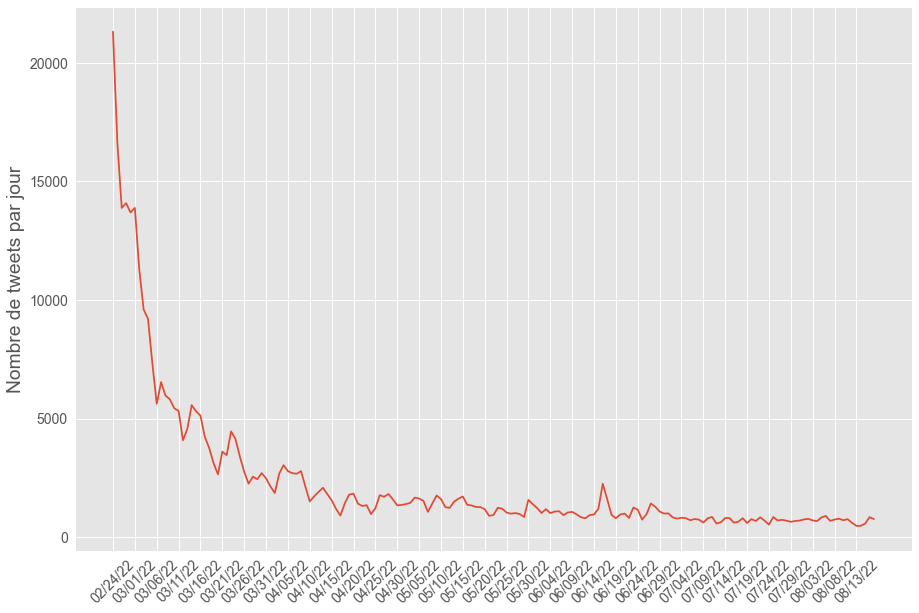

In [17]:
# Evolution du nombre de tweets par jour
fig, ax = plt.subplots(figsize=(15,10))
x = df2['day']
y = df2['counts']
plt.plot(x, y)
_ = ax.set_xticks(x[::5])
_ = ax.set_xticklabels(x[::5], rotation=45)
_=ax.tick_params(axis='both', which='major', labelsize=14)
#_ = plt.xlabel('Jour')
_ = plt.ylabel('Nombre de tweets par jour')

In [18]:
# Création de df3: 2 colonnes= semaine + count=nbre de tweets par semaine
df3=df.groupby(['week_number']).size().reset_index(name='counts')
df3.head()

,week_number,counts
0,08,65893
1,09,70634
2,10,37729
3,11,29733
4,12,24078


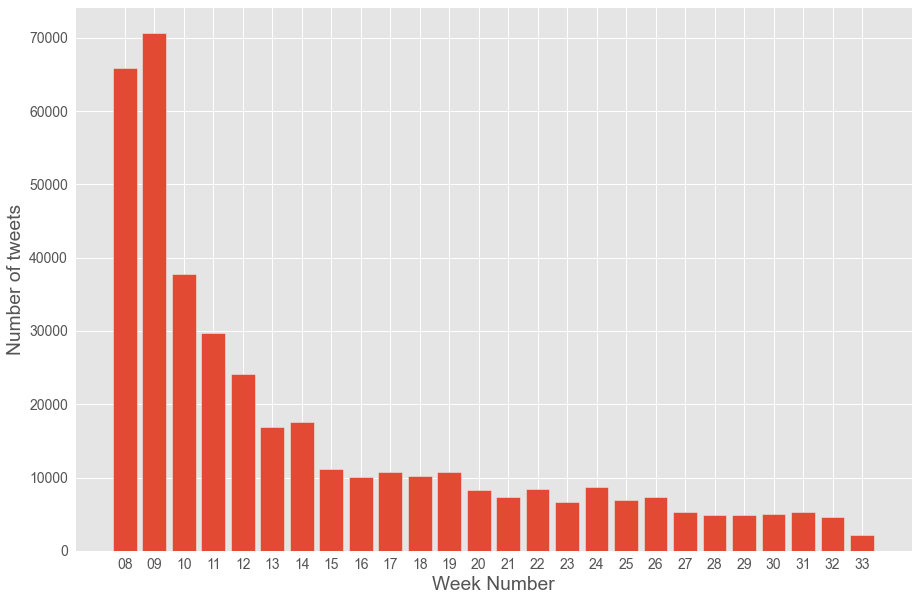

In [19]:
# Evolution du nombre de tweets par semaine
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(df3['week_number'], df3['counts'])
_ = ax.set_xlabel('Week Number')
_ = ax.set_ylabel('Number of tweets')
_=ax.tick_params(axis='both', which='major', labelsize=14)

## 2.2 Nombre de mots


In [20]:
document_lengths = np.array(list(map(len, df['content'].str.split(' '))))

print(f"Le nombre moyen de mots par tweet est : {int(np.mean(document_lengths))}.")


print(f"Le nombre minimum de mots par tweet est: {min(document_lengths)}.")
print(f"Le nombre maximum de mots par tweet est: {max(document_lengths)}.")

Le nombre moyen de mots par tweet est : 27.
Le nombre minimum de mots par tweet est: 1.
Le nombre maximum de mots par tweet est: 137.


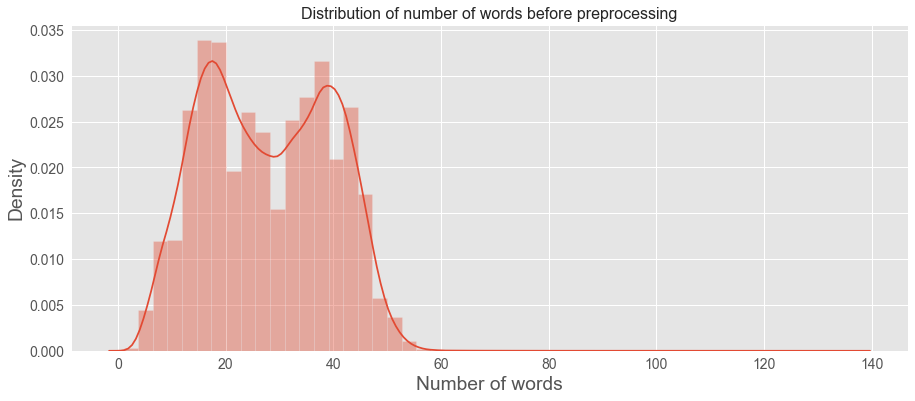

In [21]:
fig, ax = plt.subplots(figsize=(15,6))

_=ax.set_title("Distribution of number of words before preprocessing", fontsize=16)
_=ax.set_xlabel("Number of words")
_=sns.distplot(document_lengths, bins=50, ax=ax)
_=ax.tick_params(axis='both', which='major', labelsize=14)

## 2.3. Analyse des emoji pour préparer une analyse de sentiments (non traitée ici)
* https://emojis.readthedocs.io/en/latest/api.html#module-emojis
* https://www.kaggle.com/code/infamouscoder/emoji-sentiment-features
* https://www.kaggle.com/code/infamouscoder/emoji-sentiment-features


### 2.3.1. Analyse globale

In [ ]:
#!pip install emojis

In [22]:
def create_column_emoji(my_pd):
    """
    Crée une liste des labels des emojis en francais.

    Paramètres
    ----------

    my_list : liste d'emojis.

    """
    col_emo=[]
    my_set=emojis.get(my_pd)
    #for emo in my_set:
    #    val = emoji.demojize(emo, language='fr').split(':')[1]
    #    col_emo.append(val)
    return list(my_set)
    

In [23]:
# Création d'une colonne qui contient tous les émojis des tweets
df['emoji']=df['content'].apply((lambda x : create_column_emoji(x)))

In [24]:
df_copy = df.copy()

In [25]:
print(f"Le % de tweets comportant des emojis est: {np.ceil(100*df.loc[(df['emoji'].str.len() != 0),:].shape[0]/df.shape[0])}%.")


Le % de tweets comportant des emojis est: 29.0%.


In [26]:
df['emoji'].head()

0    [▶️, 🇫🇷, 🔝, ℹ️, 🇺🇦, 🇷🇺, 🚨, 🛑, 🙏, 💖]
1                                     []
2                                     []
3                                     []
4                                     []
Name: emoji, dtype: object

In [ ]:
#df_emoji = df[df['emoji'].str.len() != 0]

Cela n'est pas suffisant pour une prise en compte.

### 2.3.2. Preprocessing pour une analyse de sentiments

In [27]:
# Sélection des tweets comportant des emojis
df_emoji = df[df['emoji'].str.len() != 0]

In [28]:
# Création de nouvelles colonnes correspondant aux sentiments exprimés

df_emoji['positive_emoji'] = 0
df_emoji['neutral_emoji'] = 0
df_emoji['negative_emoji'] = 0

positive_emoji = ['❤️','❤','😍','♥️','😊','💕','👍','😂','🙌','🤑','💖','✨','😊','🎉','💞','😝','😈','😃','😁','😎','😘','💓','😉','😬','😄','😀','😜','💗','😌','😆','😛','😻','🙋','❣️','🙂','😇','💝','😏','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']
neutral_emoji = ['🙏','💜','💙','👽','💛','💟','💚','😅','🙃','💩','😳','🙄','😑','🙇','🙎','😐','😶']
negative_emoji = ['💥','💘','😭','😱','👎','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔','😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧','😟','😹','😵','😶','😯','🤒','🤕','😾','💤']

In [30]:
choix_analyse_emojis = 0

if choix_analyse_emojis==1:
    print("Analyse emojis en cours")

    for idx, text in enumerate(df_emoji['emoji']):
    
        for emoj in text:
        
            if emoj in positive_emoji:
                df_emoji['positive_emoji'].iloc[idx] += 1
            elif emoj in negative_emoji:
                df_emoji['negative_emoji'].iloc[idx] += 1
            else:
                df_emoji['neutral_emoji'].iloc[idx] += 1

In [31]:
if choix_analyse_emojis==1:

    print(f" Voici le bilan de l'analyse de sentiments: \n")
    print(f"Score positif: {df_emoji['positive_emoji'].value_counts()} " )
    print(f"Score négatif: {df_emoji['negative_emoji'].value_counts()} " )
    print(f"Score neutre:  {df_emoji['neutral_emoji'].value_counts()} " )

## 2.4. Suppression des hastags, url, arobase

In [ ]:
df.head()

In [32]:
#remove urls, hashtags, arobase (et emoji)
def remove_urls(text):
    return re.sub(r'http\S+',' ', text)

def remove_hashtags(text):
    return re.sub(r'#\S+',' ', text)

def remove_arobase(text):
    return re.sub(r'@\S+',' ', text)

def remove_emojis(text):
    string = ' '.join([word for word in text if word not in emo_list])
    return string 

In [33]:
df['content_clean'] = df['content'].apply(remove_hashtags)
df['content_clean'] = df['content_clean'].apply(remove_urls)
df['content_clean'] = df['content_clean'].apply(remove_arobase)

In [34]:
df[['content','content_clean']].head()

,content,content_clean
0,🔝#INFO à #RT 🙏💖 \n🇫🇷 #FR #RU #eZ #GJ #JB #lr \n#Zemmour #Zozz #Patriotes #JambonBeurre \n\n🚨Jour_175 #GUERRE #Ukraine + #OTAN &gt;&gt; #RUSSIE + #...,🔝 à 🙏💖 \n🇫🇷 \n \n\n🚨Jour_175 + &gt;&gt; + \n\n 🛑 - EVENEMENTS du JOUR en UKRAINE 🇺🇦 -\n\n🇺🇦 a encore intercepté un ...
1,"#Ukraine / Centrale nucléaire de Zaporijjia: Kiev affirme qu'il faut se ""préparer à tous les scénarios"" https://t.co/PA2qLQUUEb via @BFMTV","/ Centrale nucléaire de Zaporijjia: Kiev affirme qu'il faut se ""préparer à tous les scénarios"" via"
2,@WAW_AgainstWar Je me demande ce qu’ils vont dire aux peuples russe ses présentateurs a la co…quand la Poutine va perdre Kherson et la Crimée. En ...,Je me demande ce qu’ils vont dire aux peuples russe ses présentateurs a la co…quand la Poutine va perdre Kherson et la Crimée. En tous les cas i...
3,Guerre en Ukraine : Deux civils tués et sept blessés dans la région de Donetsk \n#Ukraine #UkraineRussie #UkraineInvasion #Russie #GuerreEnUkraine...,Guerre en Ukraine : Deux civils tués et sept blessés dans la région de Donetsk \n \n
4,@24hPujadas @trinquand Berlin a-t-il connaissance de la présence en #Ukraine de matériel militaire qui pourrait avoir été remis à #Kiev par des Br...,"Berlin a-t-il connaissance de la présence en de matériel militaire qui pourrait avoir été remis à par des Britanniques, des Américains, de..."


# 3. Listes de stop words

## 3.1. Module ntk: french_stopwords_list

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sylvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sylvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:

# Création d'une liste de stopword en français à partir de nltk
french_stopwords_list = stopwords.words('french')

# Suppression des accents
french_stopwords_list=[unidecode(x) for x in french_stopwords_list]

# ajout ukraine, guerre et annee
french_stopwords_list.append('ukraine')
french_stopwords_list.append('guerre')
french_stopwords_list.append('annee')

#print(f"Ci-dessous, la liste des stopwords en français de nltk :\n{french_stopwords_list}")


## 3.2 Module stopwords: french_stopwords_list_2

In [37]:
#!pip install stop-words

In [38]:
from stop_words import get_stop_words

In [39]:
french_stopwords_list_2 = get_stop_words('french')
#print(f"Ci-dessous, la liste des stopwords en français de stop_words :\n{french_stopwords_list_2}")


In [40]:
# Suppression des accents

french_stopwords_list_2=[unidecode(x) for x in french_stopwords_list_2]
#print(f"Ci-dessous, la liste des stopwords SANS ACCENT de stop_words :\n{french_stopwords_list_2}")

## 3.3 Fusion des 2 listes: french_stopwords_list_3


In [41]:
french_stopwords_list_3 = set(french_stopwords_list + french_stopwords_list_2)
french_stopwords_list_3 = sorted (french_stopwords_list_3 )

print(f"Ci-dessous, la liste complète des stopwords en français :\n {french_stopwords_list_3}")

Ci-dessous, la liste complète des stopwords en français :
 ['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'annee', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bon', 'c', 'ca', 'car', 'ce', 'ceci', 'cela', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'ci', 'comme', 'comment', 'd', 'dans', 'de', 'debut', 'dedans', 'dehors', 'depuis', 'des', 'deux', 'devoir', 'devrait', 'devrez', 'devriez', 'devrions', 'devrons', 'devront', 'dois', 'doit', 'donc', 'dos', 'droite', 'du', 'elle', 'elles', 'en', 'encore', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etante', 'etantes', 'etants', 'etat', 'ete', 'etee', 'etees', 'etes', 'etiez', 'etions', 'etre', 'eu', 'eue', 'eues', 'eumes', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eu

# 4. Prétraitement (suite) 

## 4.1 Prétraitement: Nettoyage complet = suppression des stopwords, etc..


In [42]:
# Création d'une fonction pour supprimer les stop words
def no_stop_word(string, stopWords):

    """
    Supprime les stop words d'un texte.

    Paramètres
    ----------

    string : chaine de caractère.

    stopWords : liste de mots à exclure. 
    """
    
    string = ' '.join([word for word in string.split() if word not in stopWords])
    return string

# Création de la fonction de NETTOYAGE COMPLET
def final_cleaner(pandasSeries, stopWords):
    
    """
    Stemmatise une Series Pandas de documents 

    Paramètres
    ----------
    
    pandasSeries : Une Series Pandas

    stemmer : Stemmer de NLTK
    
    stopWords : Une liste de stopWords
    """
    
    print("#### Nettoyage en cours ####") 
    
    # confirmation que chaque article est bien de type str
    pandasSeries = pandasSeries.apply(str)
        
    # Passage en minuscule
    print("... Passage en minuscule") 
    pandasSeries = pandasSeries.apply(lambda x : x.lower())
    
    # Suppression des accents
    print("... Suppression des accents") 
    pandasSeries = pandasSeries.apply(unidecode)
    
    # Détection du champs année
    print("... Détection du champs année") 
    pandasSeries = pandasSeries.apply(lambda x : re.sub(r'[0-9]{4}', 'annee', x))
    
    # Suppression http
    #print("... Suppression http") 
    #pandasSeries = pandasSeries.apply(lambda x : re.sub(r'https://', ' ', x))
    
    # Suppression des caractères spéciaux et numériques
    print("... Suppression des caractères spéciaux et numériques") 
    pandasSeries = pandasSeries.apply(lambda x :re.sub(r"[^a-z]+", ' ', x))
    
    # Suppression des stop words
    print("... Suppression des stop words") 
    #stopWords = [unidecode(sw) for sw in stopWords]
    pandasSeries = pandasSeries.apply(lambda x : no_stop_word(x, stopWords))
 
    print("#### Nettoyage OK! ####")

    return pandasSeries

In [43]:
# Application du nettoyage final
df['content_clean_final'] = final_cleaner(df['content_clean'], french_stopwords_list_3)

#### Nettoyage en cours ####
... Passage en minuscule
... Suppression des accents
... Détection du champs année
... Suppression des caractères spéciaux et numériques
... Suppression des stop words
#### Nettoyage OK! ####


## 4.2 STEMMATISATION et LEMMATISATION

### 4.2.1 STEMMATISATION 

In [44]:
# Création d'une fonction de STEMMATISATION

def stemmatise_text(text,stemmer):

    """
    Stemmatise un texte : Ramène les mots d'un texte à leur racine (peut créer des mots qui n'existe pas).

    Paramètres
    ----------

    text : Chaine de caractères.

    stemmer : Stemmer de NLTK.
    """

    return " ".join([stemmer.stem(word) for word in text.split()])

In [45]:
# On initialise un stemmer NLTK
stemmer = SnowballStemmer('french')


# Application de la fonction stemmatise_text
df['content_stem'] = df['content_clean_final'].apply(lambda x : stemmatise_text(x,stemmer))

df[['content_clean_final', 'content_stem']].head()

,content_clean_final,content_stem
0,jour gt gt evenements jour intercepte transport munition i,jour gt gt even jour intercept transport munit i
1,centrale nucleaire zaporijjia kiev affirme faut preparer scenarios via,central nucleair zaporijji kiev affirm faut prepar scenarios vi
2,demande dire peuples russe presentateurs co poutine va perdre kherson crimee cas savent bien lecher cul poutine gloire,demand dir peupl russ present co poutin va perdr kherson crime cas savent bien lech cul poutin gloir
3,civils tues sept blesses region donetsk,civil tu sept bless region donetsk
4,berlin connaissance presence materiel militaire pourrait remis britanniques americains francais voire allemands,berlin connaiss presenc materiel militair pourr rem britann americain franc voir allemand


### 4.2.2 LEMMATISATION


In [46]:
# Création d'une fonction de LEMMATISATION

def lemmatise_text(text):

    """
   Lemmatise un texte 
    Paramètres
    ----------

    text : Chaine de caractères.

    lemmer : lemmer de simplema
    """

    return " ".join([simplemma.lemmatize(word, lang='fr') for word in text.split()])

# Application de la fonction lemmatise_text
df['content_lem'] = df['content_clean_final'].apply(lambda x : lemmatise_text(x))

df[['content_stem', 'content_lem']].head()

,content_stem,content_lem
0,jour gt gt even jour intercept transport munit i,jour gt gt evenements jour intercepter transport munition ie
1,central nucleair zaporijji kiev affirm faut prepar scenarios vi,centrale nucleaire zaporijjia kiev affirmer falloir preparer scenarios via
2,demand dir peupl russ present co poutin va perdr kherson crime cas savent bien lech cul poutin gloir,demande dire peuple russe presentateurs co poutine aller perdre kherson crimee cas savoir bien lecher cul poutine gloire
3,civil tu sept bless region donetsk,civil tuer sept blesser region donetsk
4,berlin connaiss presenc materiel militair pourr rem britann americain franc voir allemand,berlin connaissance presence materiel militaire pouvoir remis britannique americains francais voire allemand


### 4.2.3 Filtrage des tweets qui contiennent trop peu de mots

In [47]:
# Taille avant filtrage
df.shape

(401107, 35)

In [48]:
# Filtrage 
df = df[df['content_lem'].str.len() >= 3]
# Taille après filtrage
df.shape

(400346, 35)

## 4.3. Visualisation des MOTS LES PLUS UTILISES après traitement

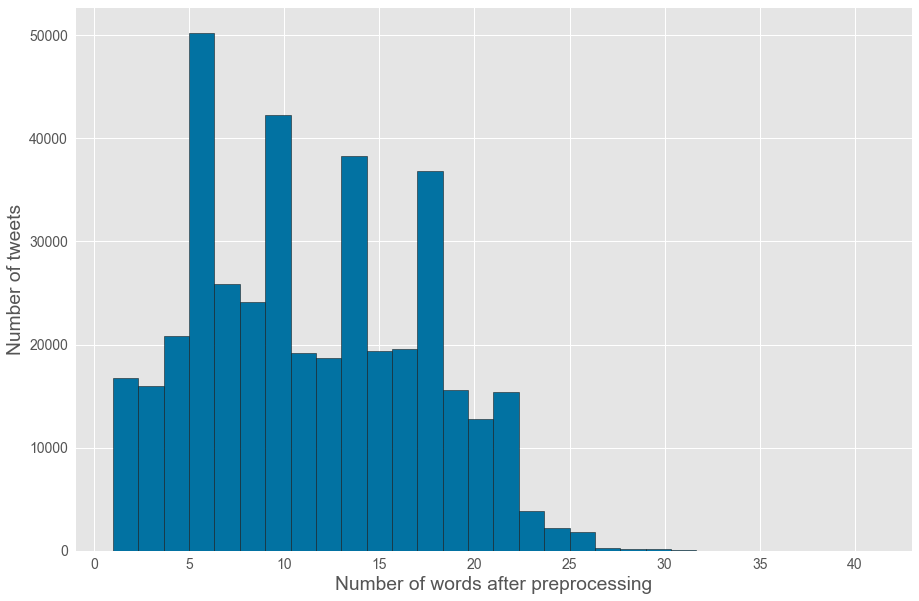

In [49]:
# Création d'une variable contenant le nombre de "mots" de chaque article
df['nb_words_lem'] = df['content_lem'].apply(lambda x: len(x.split()))

# Affichage du dataframe df
#df.head()

# Répartition des tweets en fonction du nombre de mots
#plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['nb_words_lem'], bins=30, color='b', edgecolor='k')
_ = ax.set_xlabel('Number of words after preprocessing')
_ = ax.set_ylabel('Number of tweets')
_=ax.tick_params(axis='both', which='major', labelsize=14)

In [55]:
print(f" Bilan du nombre de tweets par nombre de mots:\n {df['nb_words_lem'].value_counts()}") 

 Bilan du nombre de tweets par nombre de mots:
 6     26410
7     25829
8     24103
5     23802
9     22005
10    20258
16    19582
15    19362
14    19282
11    19187
17    19092
13    19001
12    18670
18    17700
19    15567
20    12746
21     9156
22     6236
23     3900
24     2245
25     1239
26      630
27      312
28      186
29      105
30       66
31       37
32       24
33       16
35        7
34        7
36        6
37        5
41        1
Name: nb_words_lem, dtype: int64


In [51]:
# Suppression tweets dont le contenu lemmatisé contient moins de 4 mots
df = df[df['nb_words_lem'] >4]

In [56]:
# Vérification du tri
#df['nb_words_lem'].value_counts()

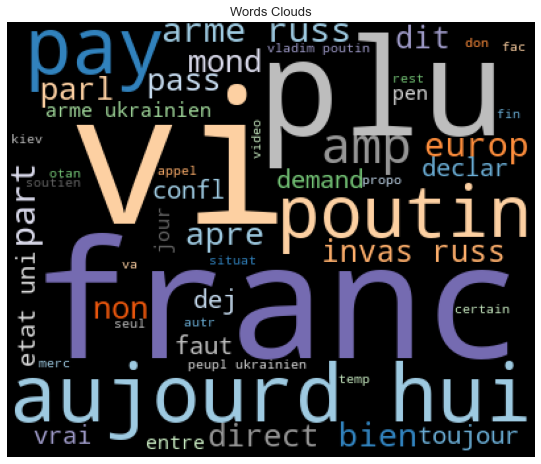

In [57]:
# Import the wordcloud library
import wordcloud 

# Join the different processed tweets together.
long_string = ' '.join(df['content_stem'])

# Create a WordCloud object
wc = wordcloud.WordCloud(width=400,
                      height=330,
                      max_words=50,
                      colormap='tab20c',
                      collocations=True)

# Generate a word cloud
wc.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.title('Words Clouds', fontsize=13)
plt.show()

In [58]:
# Fonction pour afficher les mots les plus utilisés 
def print_words(df , col, nb_words):
    
    """
   print les max_words mots les plus fréquemment utilisés par cluster

    Paramètres
    ----------
    
    df : DataFrame Pandas
    
    col : La série de df à analyser (après pré-processing)

    nb_words : nombre de mots

    """


        
    data = df[col]
        
    long_string = ' '.join(data)
        
    my_counts =  Counter(re.findall('\w+', long_string))
  
    most_occur = my_counts.most_common(nb_words)
  
    #print(f"Top {nb_words} :\n {most_occur}.")
    
    return most_occur

In [59]:
top_list=print_words(df , 'content_lem', 20)
df_top = pd.DataFrame(top_list, columns= ['Word','Count'])
print("Visualisation des mots les plus  utilisés:")
df_top.head(20)

Visualisation des mots les plus  utilisés:


,Word,Count
0,russe,71102
1,ukrainien,50323
2,plus,35120
3,russie,28065
4,pays,23303
5,contre,21947
6,aller,21067
7,poutine,20337
8,pouvoir,17624
9,via,17238


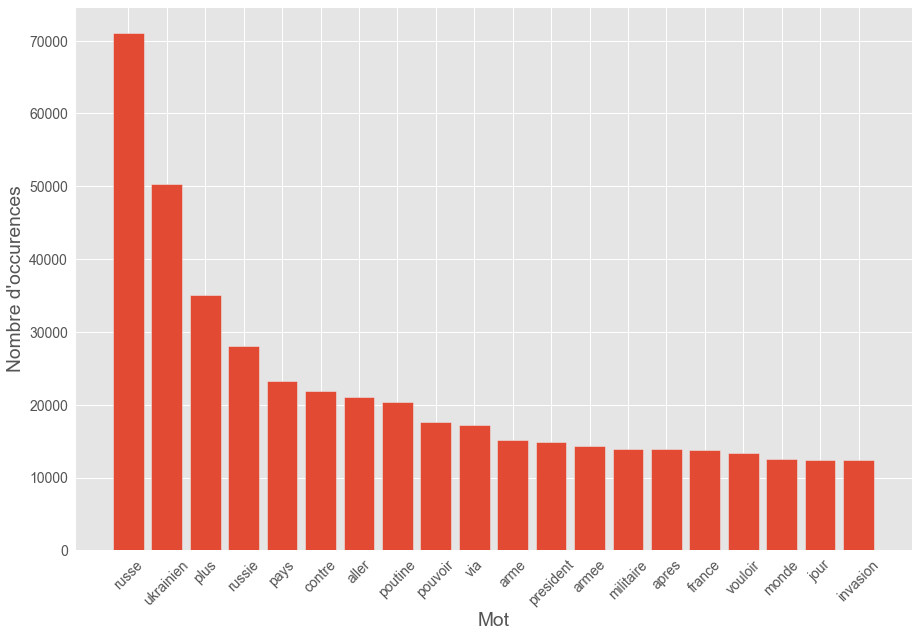

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(df_top['Word'], df_top['Count'])
_ = ax.set_xticklabels(df_top['Word'], rotation=45)
_ = ax.set_xlabel('Mot')
_ = ax.set_ylabel('Nombre d\'occurences')
_=ax.tick_params(axis='both', which='major', labelsize=14)

## 4.4. Analyse des hashtags

In [61]:
# Nombre de tweets pour lesquels il n'y a pas de hastag
df['hashtags'].isnull().sum()

102

In [62]:
# Suppression de ces tweets qui sont peu nombreux
df.dropna(subset=['hashtags'], inplace= True)

In [63]:
# Fonction qui transforme les hashtags en une liste de mots
def list_hashtags(list_txt):
    if len(list_txt)==1:
        return list_txt[0]
    else: 
        return ' '.join(list_txt)

In [ ]:
#clean_hashtags([df['hashtags'][0]])

In [64]:
df['hashtags_clean'] = df['hashtags'].apply(lambda x : list_hashtags(x))

In [65]:
df[['hashtags', 'hashtags_clean']].head(10)

,hashtags,hashtags_clean
0,"[INFO, RT, FR, RU, eZ, GJ, JB, lr, Zemmour, Zozz, Patriotes, JambonBeurre, GUERRE, Ukraine, OTAN, RUSSIE, Donbass, DernièresInfos]",INFO RT FR RU eZ GJ JB lr Zemmour Zozz Patriotes JambonBeurre GUERRE Ukraine OTAN RUSSIE Donbass DernièresInfos
1,[Ukraine],Ukraine
2,[Ukraine],Ukraine
3,"[Ukraine, UkraineRussie, UkraineInvasion, Russie, GuerreEnUkraine, guerreUkraine, Donetsk]",Ukraine UkraineRussie UkraineInvasion Russie GuerreEnUkraine guerreUkraine Donetsk
4,"[Ukraine, Kiev]",Ukraine Kiev
5,"[LCI, Ukraine, Donbass]",LCI Ukraine Donbass
6,"[LCI, nazis, Donbass, Ukraine, KerchBridge]",LCI nazis Donbass Ukraine KerchBridge
8,"[Ukraine, Guerre, Russie]",Ukraine Guerre Russie
9,"[Ukraine, UkraineInvasion, Russie, France, Inde, GuerreEnUkraine, guerreUkraine, politique]",Ukraine UkraineInvasion Russie France Inde GuerreEnUkraine guerreUkraine politique
10,"[Ukraine, UE, ONU, Russia, USA]",Ukraine UE ONU Russia USA


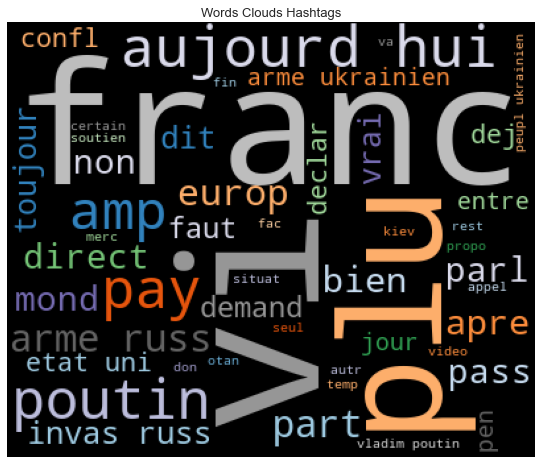

In [66]:
# Join the different processed tweets together.
long_string_hashtags = ' '.join(df['hashtags_clean'])

# Create a WordCloud object
wc = wordcloud.WordCloud(width=400,
                      height=330,
                      max_words=50,
                      colormap='tab20c',
                      collocations=True)

# Generate a word cloud
wc.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.title('Words Clouds Hashtags', fontsize=13)
plt.show()

In [67]:
top_list_hashtags=print_words(df , 'hashtags_clean', 20)
df_top_hashtags = pd.DataFrame(top_list, columns= ['Word','Count'])
print(" Voici les hashtags les plus utilisés:")
df_top_hashtags.head(20)

 Voici les hashtags les plus utilisés:


,Word,Count
0,russe,71102
1,ukrainien,50323
2,plus,35120
3,russie,28065
4,pays,23303
5,contre,21947
6,aller,21067
7,poutine,20337
8,pouvoir,17624
9,via,17238


L'analyse des mots les plus utilisés dans les hashtags et les tweets donne à peu près la même chose...

# 5. Clustering

In [ ]:
# Suppression des tweets qui contiennent moins de 3 mots après lemmatisation

## 5.1 Kmeans

In [72]:
# Vectoriseur TFIDF: on ignore les mots présents dans plus de 50% des tweets ou dans moins de 1000 tweets
# On ne prend en compte que les bigrams et lres trigrams.
tfidf = TfidfVectorizer(max_df=0.5,
                        min_df=500,
                        ngram_range=(2,3))
                       

In [ ]:
# Vectoriseur COUNT
#count = CountVectorizer(min_df=1000,
                        #max_df=0.5,
                        #ngram_range=(1, 3), # sélection bigrammes
) 

In [74]:
# Matrice des tweets vectorisés avec tfidf
tfidf_matrix = tfidf.fit_transform([x for x in df["content_lem"]])
print("Voici les dimensions de la matrice des tweets vectorisés:")
print(tfidf_matrix.shape)

Voici les dimensions de la matrice des tweets vectorisés:
(346672, 144)


In [ ]:
#count_matrix = count.fit_transform([x for x in df["content_lem"]])


In [ ]:
#print(count_matrix.shape)

In [75]:
list_words_tfidf = tfidf.get_feature_names()
#type(list_words_tfidf)

https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#.YzVS_YRBwuW

https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

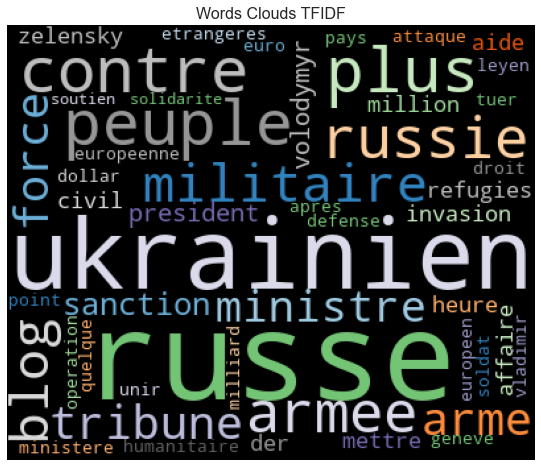

In [76]:
# Create a WordCloud object
wc = wordcloud.WordCloud(width=400,
                      height=330,
                      max_words=50,
                      colormap='tab20c',
                      collocations=True)

# Generate a word cloud
wc.generate(' '.join(list_words_tfidf))

# Visualize the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.title('Words Clouds TFIDF', fontsize=16)
plt.show()

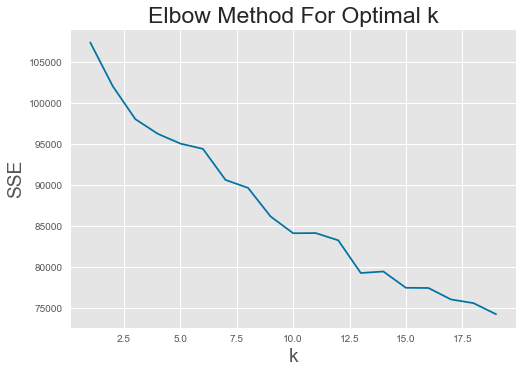

In [77]:
# Recherche du nombre de clusters optimal avec la méthode du coude
Sum_of_squared_distances =[]
K = range(1,20)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)


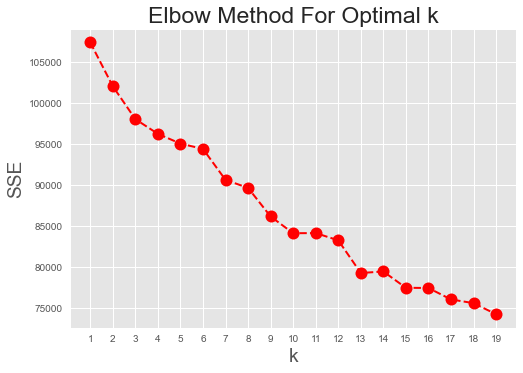

In [84]:
    
plt.plot(K, Sum_of_squared_distances, color='red', marker='o', linestyle='dashed',
    linewidth=2, markersize=12) 
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.xticks(ticks=range(1,20))
plt.show()

https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [95]:
# Application de kmeans puis création d'une colonne cluster
km = KMeans(
        n_clusters=6,
        max_iter=100,
        n_init=1,
        random_state=5)


# Fit the k-means object with tfidf_matrix or count_matrix
km.fit_transform(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each tweet
df["cluster"] = clusters

# Display number of tweets per cluster 
df['cluster'].value_counts() 

1    338924
2      3447
5      2300
4       779
0       676
3       546
Name: cluster, dtype: int64

In [96]:

def print_words_clusters(df , col, col_clus,  nb_cluster, nb_words):
    
    """
   print les max_words mots les plus fréquemment utilisés par cluster

    Paramètres
    ----------
    
    df : DataFrame Pandas
    
    col : La série de df à analyser (sur lesquelles les clusters ont été calculés)

    nb_cluster : nombre de clusters à prendre en compte
    
    nb_words : nombre de mots

    """

    for i in range(nb_cluster):
        
        data = df[df[col_clus] == i][col]
        
        long_string = ' '.join(data)
        
        my_counts =  Counter(re.findall('\w+', long_string))
  
        most_occur = my_counts.most_common(nb_words)
  
        print(f"Top {nb_words} du cluster n = {i+1} :\n {most_occur}.")
    
    


In [91]:
# Analyse des différents types de tweets suivant les clusters:
# Join the different processed titles together.

def plot_words_clusters(df , col, col_clus,  nb_cluster, max_words):
    
    """
   Trace un words_clouds pour chaque cluster 

    Paramètres
    ----------
    
    df : DataFrame Pandas
    
    col : La série de df à analyser (sur lesquelles les clusters ont été calculés)

    nb_cluster : nombre de clusters à prendre en compte
    
    max_words : nombre max de mots

    """

    for i in range(nb_cluster):
        
        data = df[df[col_clus] == i][col]
        
        long_string = ' '.join(data)

        # Create a WordCloud object
        wc = wordcloud.WordCloud(width=400,
                                height=330,
                                max_words=max_words,
                                colormap='tab20c',
                                collocations=True)

        # Generate a word cloud
        wc.generate(long_string)

        # Visualize the word cloud
        plt.figure(figsize=(10,8))
        plt.imshow(wc)
        plt.axis('off')
        plt.title(f'Words Clouds pour le cluster n={i+1}', fontsize=13)
        plt.show()

Word clouds des clusters


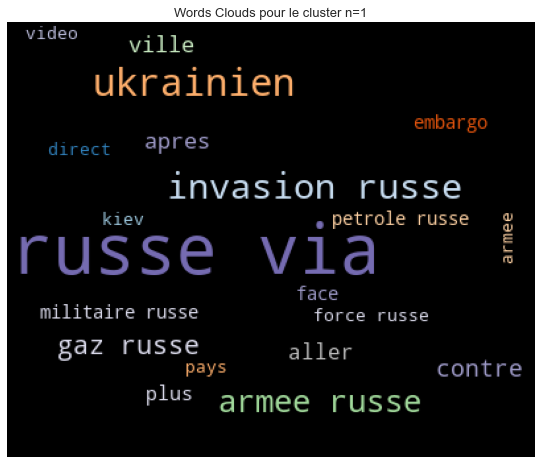

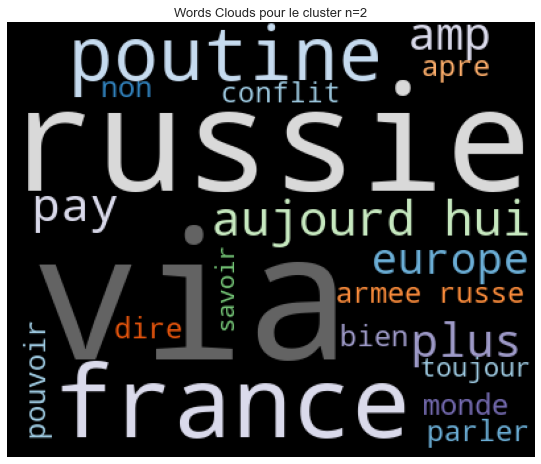

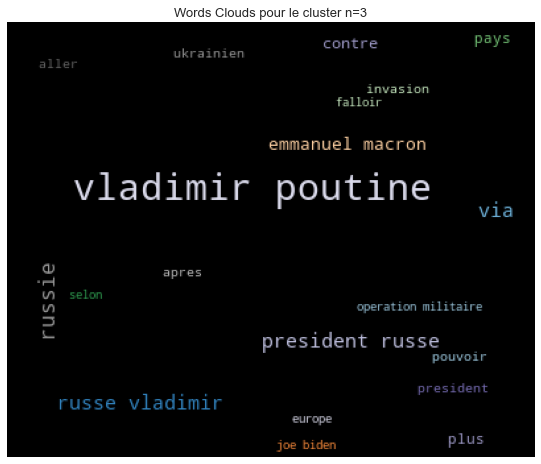

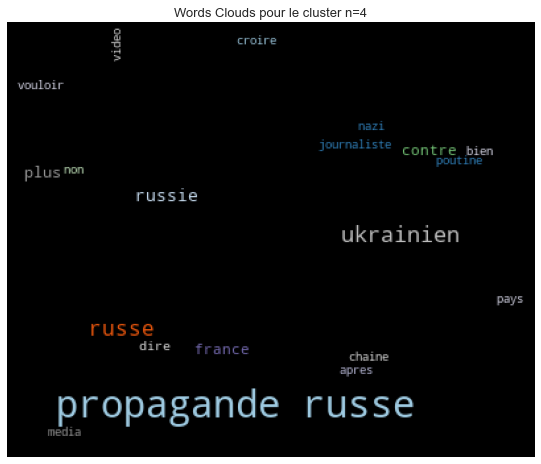

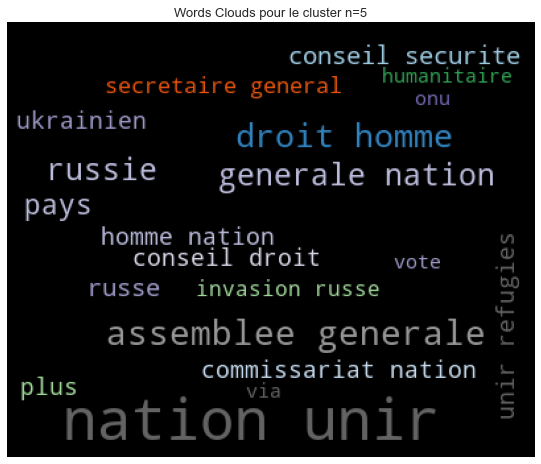

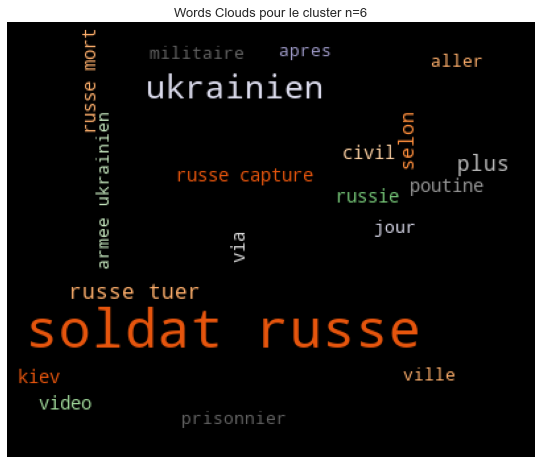

In [98]:
# Affichage des word clouds par cluster
print("Word clouds des clusters")
plot_words_clusters(df,"content_lem", "cluster", 6, 20)

## 5.3 Kmeans après réduction de dimension

### 5.2.1. Kmeans avec réduction de dimension: avec TFIDF

In [99]:
# Réduction de dimension:

lsa = make_pipeline(TruncatedSVD(n_components=30), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(tfidf_matrix)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 2.751 s
Explained variance of the SVD step: 48.6%


In [100]:
#Recherche du nombre de clusters optimum: méthode du coude

Sum_of_squared_distances =[]
K = range(1,20)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(X_lsa)
    Sum_of_squared_distances.append(km.inertia_)
    


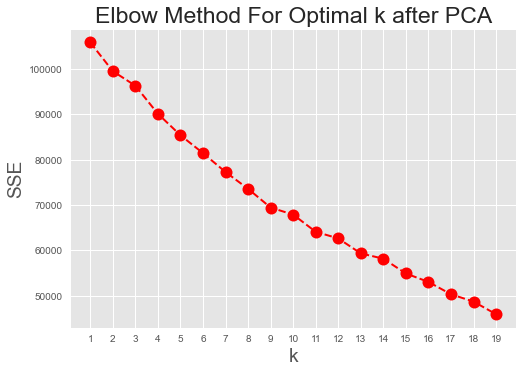

In [101]:
    
plt.plot(K, Sum_of_squared_distances, color='red', marker='o', linestyle='dashed',
    linewidth=2, markersize=12) 
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k after PCA')
plt.xticks(ticks=range(1,20))
plt.show()

In [102]:
# Application de kmeans après réduction de dimension

km = KMeans(
        n_clusters=6,
        max_iter=100,
        n_init=1,
        random_state=1)


# Fit the k-means object with tfidf_matrix or count_matrix
km.fit_transform(X_lsa)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each tweet
df["cluster_lsa"] = clusters

# Display number of tweets per cluster 
df['cluster_lsa'].value_counts() 

0    291441
2     24885
1     15523
4      6916
5      3958
3      3949
Name: cluster_lsa, dtype: int64

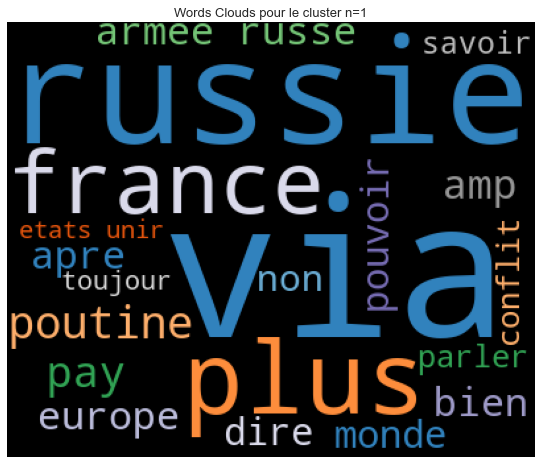

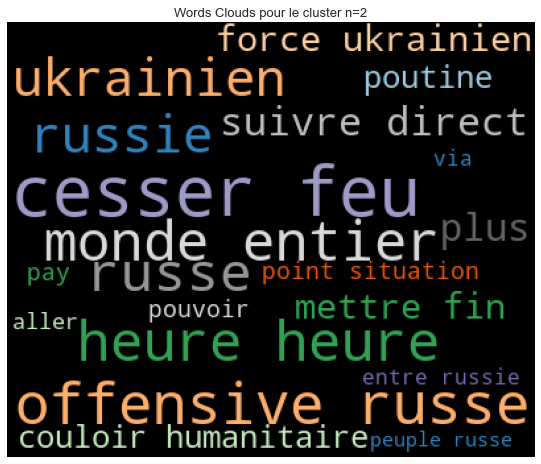

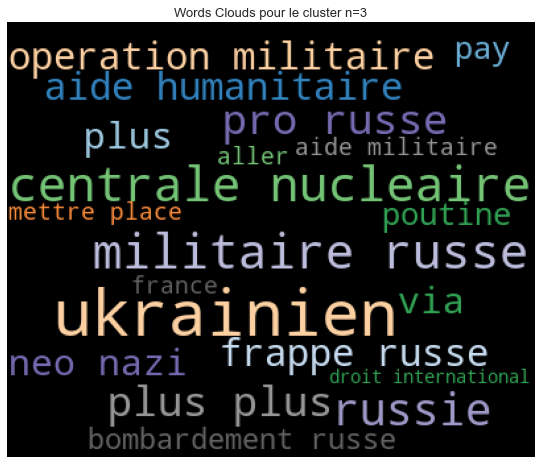

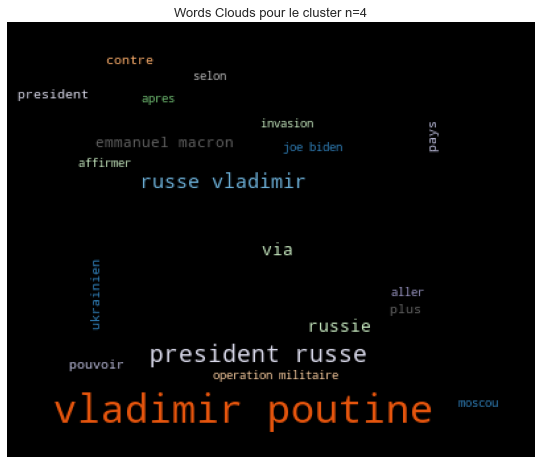

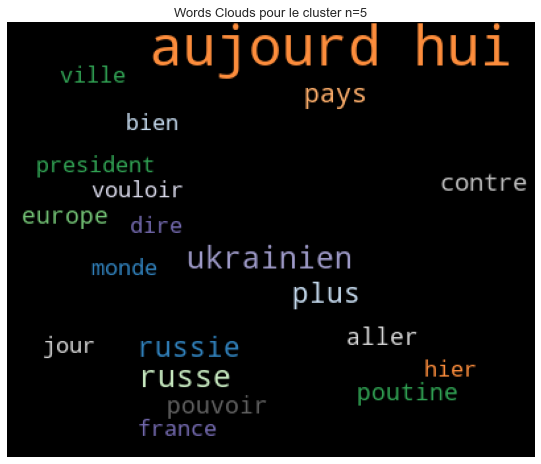

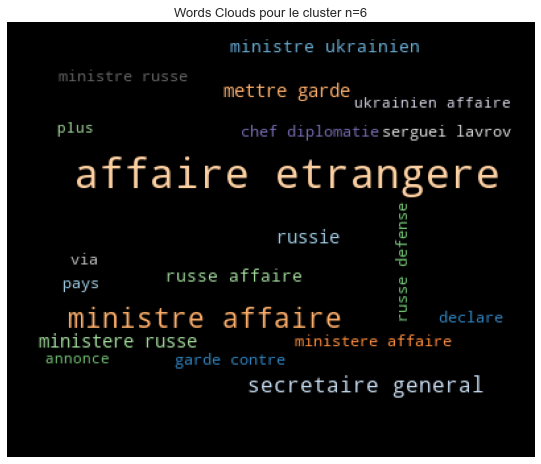

In [103]:
plot_words_clusters(df,"content_lem", "cluster_lsa", 6, 20)

# 6. Recherche de topics: LDA

## 6.1 LDA: First method (gensim+doc2bow)

Sources:

https://www.kaggle.com/code/vukglisovic/classification-combining-lda-and-word2vec

https://towardsdatascience.com/lda-topic-modeling-with-tweets-deff37c0e131

https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [104]:
#Analyse statistique
df.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId,nb_words_lem,cluster,cluster_lsa
count,3.466720e+05,346672.000000,346672.000000,346672.000000,346672.000000,3.466720e+05,0.0,5.228700e+04,346672.000000,346672.000000,346672.000000
mean,1.512800e+18,2.130132,6.674274,24.326407,0.770558,1.512665e+18,NaN,1.514415e+18,12.526368,1.044422,0.359400
std,1.705960e+16,21.154340,73.828352,434.867362,19.675189,1.799439e+16,NaN,2.184366e+16,5.188482,0.377619,0.953879
min,1.496637e+18,0.000000,0.000000,0.000000,0.000000,2.675938e+17,NaN,2.675938e+17,5.000000,0.000000,0.000000
25%,1.499110e+18,0.000000,0.000000,0.000000,0.000000,1.499088e+18,NaN,1.499295e+18,8.000000,1.000000,0.000000
50%,1.505629e+18,0.000000,0.000000,1.000000,0.000000,1.505584e+18,NaN,1.507041e+18,12.000000,1.000000,0.000000
75%,1.522805e+18,1.000000,2.000000,5.000000,0.000000,1.522662e+18,NaN,1.526969e+18,17.000000,1.000000,0.000000
max,1.560052e+18,3523.000000,15166.000000,76592.000000,6545.000000,1.560052e+18,NaN,1.560005e+18,41.000000,5.000000,5.000000


Certains tweets ne contiennent aucun mot après traitement: on les supprime.

In [106]:
# Création d'un corpus: dictionnaire de tous les mots inclus dans content_lem
all_words = [text.split() for text in df['content_lem']]
all_words = [y for x in all_words for y in x]
all_words_unique= list(set(all_words))

In [107]:

print(f"Le corpus comporte {len(all_words_unique)} mots différents.")


Le corpus comporte 81461 mots différents.


In [ ]:
#vocab = sorted(all_words_unique)
#print(vocab)

In [108]:
# Mots les plus fréquemment utilisés
word_freq = FreqDist(all_words)
#word_freq.most_common(30)



In [111]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(50)]
most_common_word = [x[0] for x in word_freq.most_common(50)]

#create dictionary mapping of word count
top_50_dictionary = dict(zip(most_common_word, most_common_count))

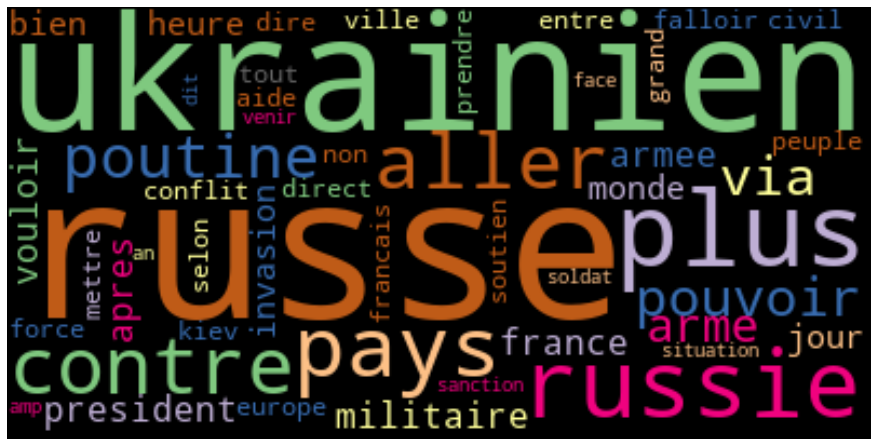

In [112]:
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_50_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_50_cloud.png')

plt.show()

In [113]:
def token_text(text):
    tokens = text.split()
    return tokens

In [114]:
df['stem_tokens']=df['content_stem'].apply(lambda x : token_text(x))

In [115]:
col_tokens = df['stem_tokens']

In [116]:
col_tokens.head()

0                                                                 [jour, gt, gt, even, jour, intercept, transport, munit, i]
1                                                  [central, nucleair, zaporijji, kiev, affirm, faut, prepar, scenarios, vi]
2    [demand, dir, peupl, russ, present, co, poutin, va, perdr, kherson, crime, cas, savent, bien, lech, cul, poutin, gloir]
3                                                                                  [civil, tu, sept, bless, region, donetsk]
4                     [berlin, connaiss, presenc, materiel, militair, pourr, rem, britann, americain, franc, voir, allemand]
Name: stem_tokens, dtype: object

In [117]:
dictionary = Dictionary(documents=df['stem_tokens'].values)


In [118]:
print("Le dictionnaire comporte {} mots.".format(len(dictionary.values())))

Le dictionnaire comporte 63994 mots.


In [119]:
dictionary.filter_extremes(no_above=0.75, no_below=1000)

dictionary.compactify()  # Reindexes the remaining words after filtering
print("Après suppression des extrêmes, il reste {} mots.".format(len(dictionary.values())))

Après suppression des extrêmes, il reste 875 mots.


In [121]:
#print(f"Voici les identifiants des mots de dictionnary après suppression outliers:\n\n {dictionary.token2id}.")


In [123]:
#Bag of words
tweets_bow = [dictionary.doc2bow(tweet) for tweet in df['stem_tokens']]

In [124]:
#The output will contain a vector for each tweet, in the form of (word id, frequency of word occurrence in document)
# Les 3 premiers tweets:
tweets_bow[0:3]

[[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1)]]

In [126]:
# LDA: 6 topics
k = 6
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = dictionary,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.046*"russ" + 0.040*"ukrainien" + 0.026*"civil" + 0.025*"bombard" + 0.023*"vill" + 0.020*"direct" + 0.020*"port" + 0.017*"mort" + 0.017*"vi" + 0.017*"kiev"'),
 (1,
  '0.052*"russ" + 0.046*"vi" + 0.027*"va" + 0.022*"invas" + 0.019*"econom" + 0.017*"confl" + 0.016*"europ" + 0.015*"consequent" + 0.015*"plus" + 0.014*"mondial"'),
 (2,
  '0.044*"ukrainien" + 0.035*"pay" + 0.032*"aid" + 0.028*"defens" + 0.024*"aerien" + 0.018*"frontier" + 0.017*"refug" + 0.017*"etat" + 0.014*"don" + 0.014*"franc"'),
 (3,
  '0.023*"plus" + 0.021*"poutin" + 0.018*"mond" + 0.016*"bien" + 0.015*"franc" + 0.013*"va" + 0.012*"faut" + 0.012*"non" + 0.011*"pay" + 0.011*"rien"'),
 (4,
  '0.094*"russ" + 0.056*"arme" + 0.047*"militair" + 0.031*"ukrainien" + 0.024*"oper" + 0.022*"h" + 0.021*"attaqu" + 0.021*"kiev" + 0.020*"forc" + 0.015*"troup"'),
 (5,
  '0.047*"russ" + 0.039*"president" + 0.028*"poutin" + 0.027*"contr" + 0.025*"europeen" + 0.024*"ukrainien" + 0.020*"sanction" + 0.018*"vladim" + 0.018*"peupl" +

Source:
https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

In [134]:
prep_visu_lda = gensimvis.prepare(tweets_lda, tweets_bow, dictionary)

In [135]:
pyLDAvis.display(prep_visu_lda)

In [129]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda, texts=df['stem_tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34238135529950836
